In [17]:
#Importing Libreries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [18]:
df_US = df[df['job_country'] =='United States'].copy()

In [19]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

In [20]:
df_US_pivot= df_US.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no']=pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot.sort_values('month_no',inplace=True)
df_US_pivot.set_index('job_posted_month',inplace=True)
df_US_pivot.drop(columns='month_no',inplace=True)


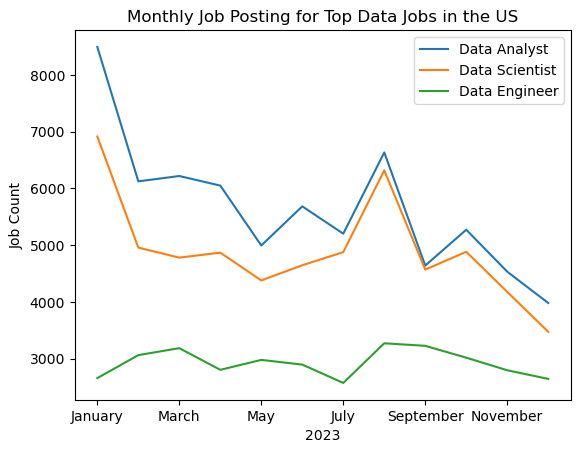

In [21]:
top3 = df_US['job_title_short'].value_counts().head(3)
top3= top3.index.tolist()
df_US_pivot[top3].plot(kind='line')
plt.title('Monthly Job Posting for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [22]:
df_US_software_pivot = pd.read_csv("http://lukeb.co/software_csv", index_col= 'job_posted_month')

In [23]:
df_US_merge = df_US_pivot.merge(df_US_software_pivot, on="job_posted_month")
top_5 = (
    df_US_merge
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .to_list()
)

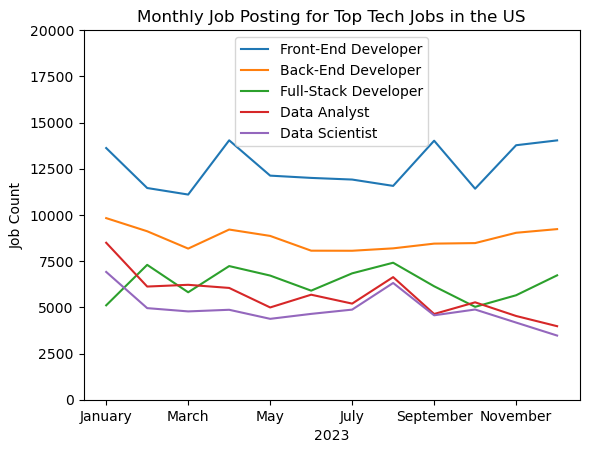

In [24]:
df_US_merge[top_5].plot(kind='line')
plt.title('Monthly Job Posting for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.legend()
plt.show()

In [25]:
# Create a DataFrame df_us_jobs that contains only job postings in the United States.
# Then, create another DataFrame df_monthly_postings that counts the number of U.S. job postings for each month.
# Merge these two DataFrames on the job_posted_month column using a right join, 
# and display the first 5 rows of the resulting DataFrame.

df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'United States']
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
merged_df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,22670
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,22670
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,22670
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,22670
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,22670


In [26]:
# Create a DataFrame df_not_remote_jobs that contains only job postings that do not offer remote work (job_work_from_home == False).
# From df_not_remote_jobs, calculate the average yearly salary (salary_year_avg) for each job title (job_title_short).
# Store the result in a new DataFrame df_not_remote_salary.
# Rename the salary column to salary_not_remote_avg.
# Merge df_not_remote_jobs and df_not_remote_salary on the job_title_short column using a right join.
# Display the first 5 rows of the resulting DataFrame.

df_not_remote_jobs = df[df['job_work_from_home'] == False].copy()
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean()
df_not_remote_salary = df_not_remote_salary.rename('salary_not_remote_avg')
merge_not_remote_job = pd.merge(df_not_remote_jobs,df_not_remote_salary, on='job_title_short',how='right')
merge_not_remote_job.head(5)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.41994


In [27]:
# Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
# Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. 
# Name this count column remote_count.
# Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.



df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
merged_df = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
merged_df.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1


In [28]:
# Create one DataFrame with job postings for Data Scientists named data_scientist_df 
# and another for Data Analysts named data_analyst_df.
# Concatenate them and display the combined DataFrame called combined_df.


data_scientist_df = df[df['job_title_short'] == 'Data Scientist'].copy()
data_analyst_df = df[df['job_title_short'] == 'Data Analyst'].copy()

combined_df = pd.concat([data_scientist_df,data_analyst_df], ignore_index=True)
combined_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04
1,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-06
2,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-04
3,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",2023-01
4,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None,2023-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368356,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,2023-01
368357,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",2023-01
368358,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,2023-03
368359,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}",2023-03


In [29]:
# Create DataFrames for job postings for the last quarter (October, November, and December). 
# These are respectively called oct_df, nov_df, and dec_df.
# Concatenate them and display the combined DataFrame named combined_df.
pd.to_datetime(df['job_posted_date'])
df['job_posted_date'].dt.month

oct_df = df[ df['job_posted_date'].dt.month == 10 ].copy()

nov_df = df[ df['job_posted_date'].dt.month == 11 ].copy()

dic_df = df[ df['job_posted_date'].dt.month == 12 ].copy()

combined_last_quarter = pd.concat([oct_df,nov_df,dic_df], ignore_index=True)
combined_last_quarter.head(5)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10
1,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",2023-10
2,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",2023-10
3,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},2023-10
4,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"['sas', 'sas', 'r', 'python', 'vba', 'sql', 'j...","{'analyst_tools': ['sas', 'spss', 'tableau', '...",2023-10


In [30]:
#Create DataFrames for 'Full-time' roles (called full_time_df) and 'Part-time' roles (called part_time_df) job postings.
# Concatenate them and display the combined DataFrame named combined_df.

full_time_df = df[df['job_schedule_type'].str.contains('Full-time',case=False, na=False)]

part_time_df = df[df['job_schedule_type'].str.contains('Part-time',case=False, na=False)]

combined_schedule = pd.concat([full_time_df,part_time_df])
combined_schedule

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785295,Data Engineer,Data Engineer_All Over India,"Cuttack, Odisha, India",via LinkedIn,Full-time and Part-time,False,India,2023-10-08 06:11:27,False,False,India,None,NaN,NaN,V-Tech Data Outsourcing,['excel'],{'analyst_tools': ['excel']},2023-10
785332,Data Scientist,Consultant Data Science & berufsbegleitender M...,"Munich, Germany",via Monster.de,Part-time,False,Germany,2023-01-15 06:20:06,False,False,Germany,None,NaN,NaN,Workwise GmbH,"['python', 'java', 'snowflake', 'azure']","{'cloud': ['snowflake', 'azure'], 'programming...",2023-01
785476,Data Scientist,"Data Scientist, Lead","Washington, DC",via Snagajob,Full-time and Part-time,False,Georgia,2023-11-01 06:58:10,False,True,United States,hour,NaN,47.620003,Booz Allen Hamilton,"['databricks', 'azure', 'aws']","{'cloud': ['databricks', 'azure', 'aws']}",2023-11
785492,Data Scientist,Data Scientist,"Arlington, VA",via Snagajob,Full-time and Part-time,False,Georgia,2023-11-01 06:58:02,False,True,United States,hour,NaN,47.620003,Booz Allen Hamilton,"['python', 'r', 'pyspark']","{'libraries': ['pyspark'], 'programming': ['py...",2023-11


In [31]:
df.to_csv('data_jobs_export.csv', index=False)

In [32]:
df_filtered = df[df['job_title_short'] == 'Data Scientist']
df_filtered.to_csv('data_scientist_jobs.csv', index=False)

In [35]:
df_new_york = df[df['job_location'] == 'New York']
df_new_york.to_excel('new_york_jobs1.xlsx')
